<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   999 non-null    object 
 1   ZCR Mean                999 non-null    float64
 2   ZCR STD                 999 non-null    float64
 3   Spectral Centroid Mean  999 non-null    float64
 4   Spectral Centroid STD   999 non-null    float64
 5   MFCC 1 MEAN             999 non-null    float64
 6   MFCC 1 STD              999 non-null    float64
 7   MFCC 2 MEAN             999 non-null    float64
 8   MFCC 2 STD              999 non-null    float64
 9   MFCC 3 MEAN             999 non-null    float64
 10  MFCC 3 STD              999 non-null    float64
 11  MFCC 4 MEAN             999 non-null    float64
 12  MFCC 4 STD              999 non-null    float64
 13  MFCC 5 MEAN             999 non-null    float64
 14  MFCC 5 STD              999 non-null    fl

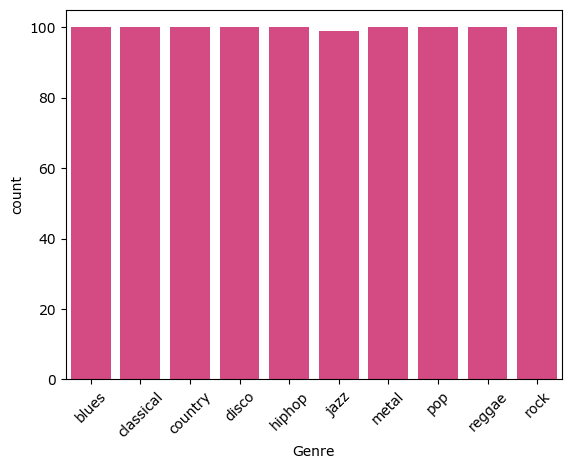

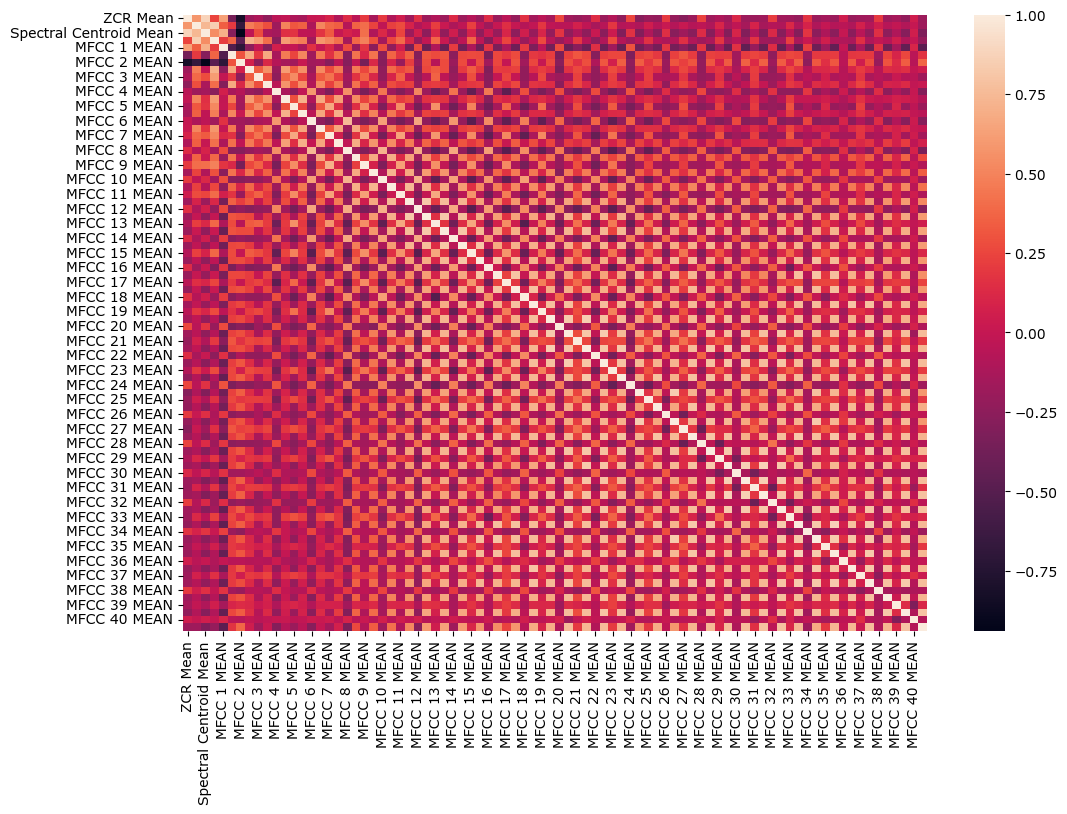

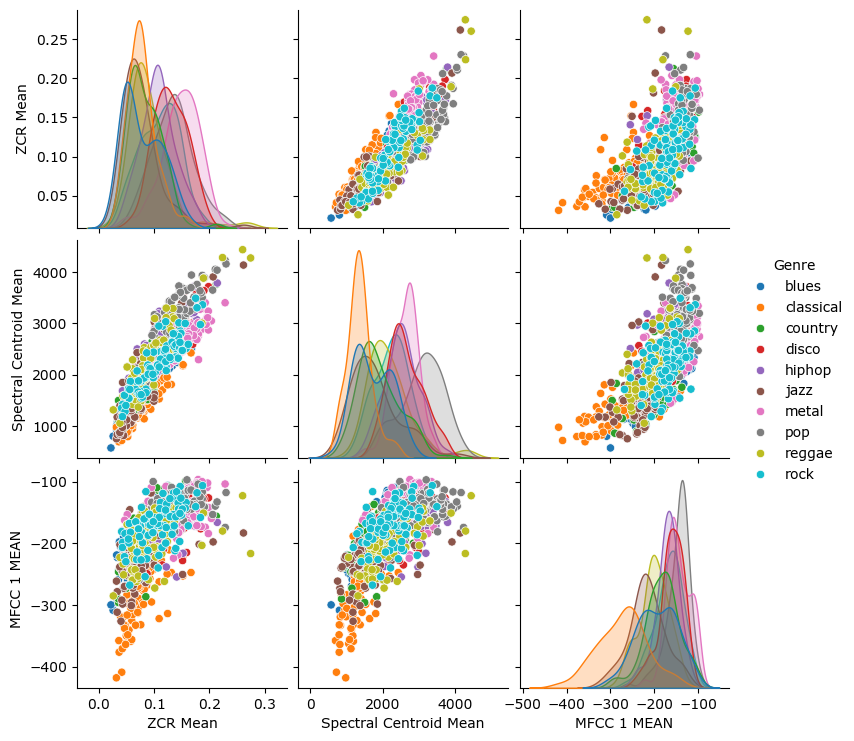

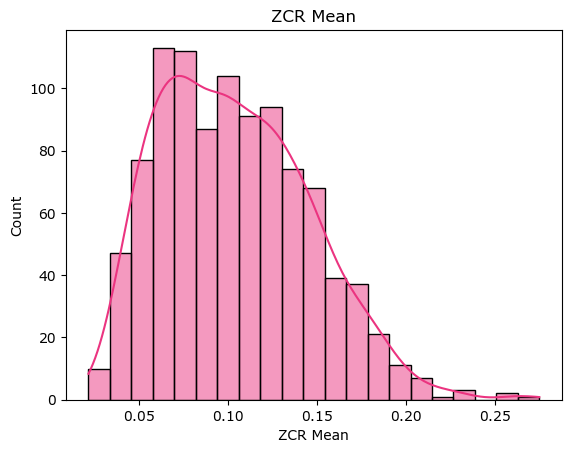

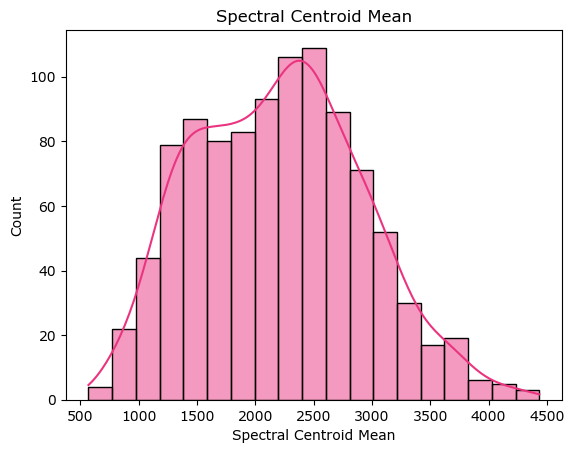

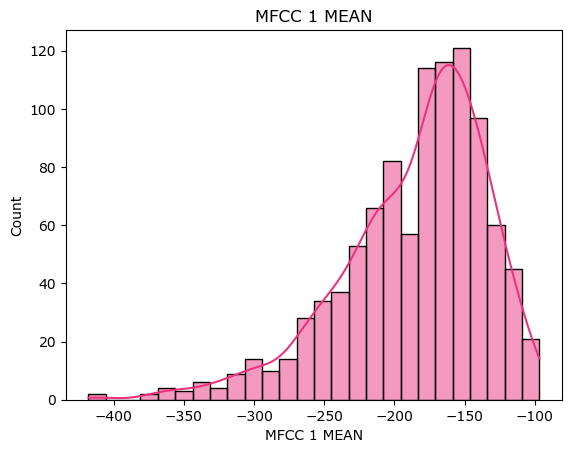

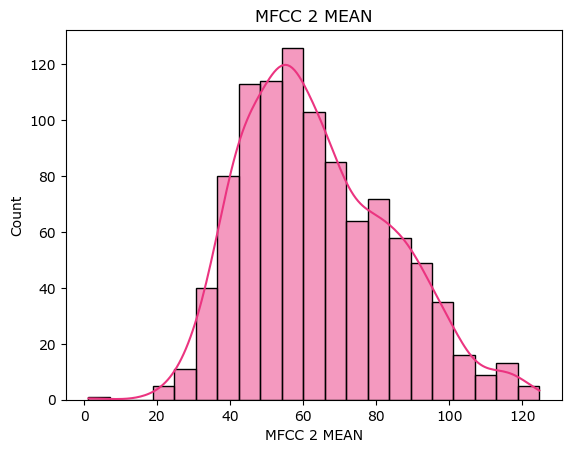

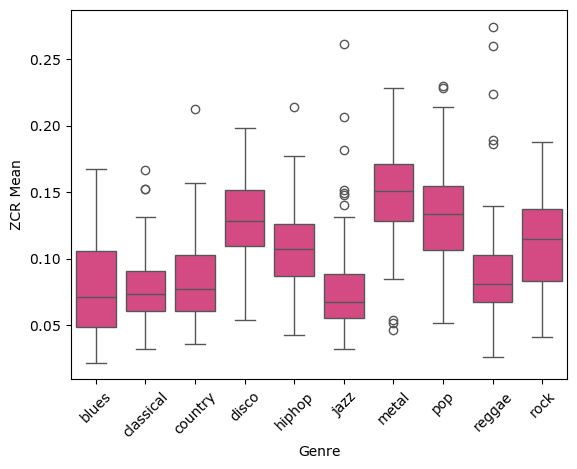

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns    
import warnings
warnings.filterwarnings('ignore')  


## Loading features from text file into a Pandas dataframe
features = pd.read_csv('features.txt', delimiter='\t')

## Exploratory Data Analysis (EDA)
features.head()
features.info(verbose=True)
features.describe()
features.shape # 999 x 85 due to 0-indexing
features.isnull().sum()

## Plotting EDA
sns.countplot(x='Genre', data=features, color='#eb3480')
plt.xticks(rotation=45)
plt.show()
features.describe().T ## flip it to show features as columns and stats as rows for better readability


# Dark Purple/Black = Strong Negative (-1.0 to -0.5)
# Red/Pink = Weak/No correlation (-0.5 to +0.5)  
# Orange/Yellow = Moderate Positive (+0.5 to +0.8)
# White = Strong Positive (+0.8 to +1.0)
plt.figure(figsize=(12,8))
sns.heatmap(features.corr(numeric_only=True), cmap='rocket', cbar=True)
plt.show()

sns.pairplot(features[['ZCR Mean','Spectral Centroid Mean','MFCC 1 MEAN','Genre']], hue='Genre')
plt.show()

features_to_plot = ['ZCR Mean','Spectral Centroid Mean','MFCC 1 MEAN','MFCC 2 MEAN']
for col in features_to_plot:
    sns.histplot(features[col], kde=True, color='#eb3480')
    plt.title(col)
    plt.show()

sns.boxplot(data=features, x='Genre', y='ZCR Mean',color='#eb3480')
plt.xticks(rotation=45)
plt.show()

## Key Observations:
## No null values observed in any column
## Dataset is balanced and each genre is represented equally (100 songs per genre)
## MFCCs are highly correlated as expected
## ZCR and Spectral Centroid show different patterns
## No observed extremely correlated features to be combined
## MFCC feature seperates genres the most
## Distinct clusters are visible for each genre
## Blues and Country have very highly overlapping features as expected
## Jazz, Hiphop and Pop have highly overlapping features as expected
## No obvious data errors or impossible values such as negative Spectral Centroid value (it is the average of positive audio frequencies)
## Spectral Centroid and MFCC DIstribution have reasonable ranges and and clear peaks
## ZCR Distribution is right-skewed and might need log tranformation
## Each genre box is appreciably in a different region from the others